<a href="https://colab.research.google.com/github/EmersonDba84/Livros_programacao/blob/master/trabalho_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho Natural Language Processing
Aluno : EMERSON PEREIRA DE SOUZA
RU 4308125

In [10]:

!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


--2025-07-06 19:16:51--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  96.1MB/s    in 0.2s    

2025-07-06 19:16:52 (96.1 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 5.00 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory

In [15]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [20]:

df = pd.read_csv('pre-processed.csv')
df.head()


,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...


In [21]:

df['label'].value_counts()


,count
label,
fake,3600
true,3600


In [22]:

stop_words = set(stopwords.words('portuguese'))

def preprocess(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['text_clean'] = df['preprocessed_news'].apply(preprocess)
df[['preprocessed_news', 'text_clean']].head()


,preprocessed_news,text_clean
0,katia abreu diz vai colocar expulsao moldura n...,katia abreu diz vai colocar expulsao moldura n...
1,ray peita bolsonaro conservador fake entrevist...,ray peita bolsonaro conservador fake entrevist...
2,reinaldo azevedo desmascarado policia federal ...,reinaldo azevedo desmascarado policia federal ...
3,relatorio assustador bndes mostra dinheiro pub...,relatorio assustador bndes mostra dinheiro pub...
4,radialista americano fala sobre pt vendem ilus...,radialista americano fala sobre pt vendem ilus...


In [30]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))

X = vectorizer.fit_transform(df['text_clean'])
y = df['label']

# Get features for REAL texts
real_texts = df[df['label'] == 'true']['text_clean']
vectorizer_real = TfidfVectorizer(ngram_range=(1,3))
X_real = vectorizer_real.fit_transform(real_texts)

print("Total de palavras + n-gramas usados dos textos rotulados como REAL:", len(vectorizer_real.get_feature_names_out()))

# Separate features into unigrams, bigrams, and trigrams for REAL texts
unigrams_real = [feature for feature in vectorizer_real.get_feature_names_out() if len(feature.split()) == 1]
bigrams_real = [feature for feature in vectorizer_real.get_feature_names_out() if len(feature.split()) == 2]
trigrams_real = [feature for feature in vectorizer_real.get_feature_names_out() if len(feature.split()) == 3]

print("Número de palavras (unigramas) dos textos rotulados como REAL:", len(unigrams_real))
print("Número de bigramas dos textos rotulados como REAL:", len(bigrams_real))
print("Número de trigramas dos textos rotulados como REAL:", len(trigrams_real))

Total de palavras + n-gramas usados dos textos rotulados como REAL: 3305882
Número de palavras (unigramas) dos textos rotulados como REAL: 74419
Número de bigramas dos textos rotulados como REAL: 1311480
Número de trigramas dos textos rotulados como REAL: 1919983


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9606481481481481
Matriz de Confusão:
 [[1061   19]
 [  66 1014]]
Relatório de Classificação:
               precision    recall  f1-score   support

        fake       0.94      0.98      0.96      1080
        true       0.98      0.94      0.96      1080

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



In [25]:

print("🔸 Acurácia:", accuracy_score(y_test, y_pred))
print("\n🔸 Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\n🔸 Relatório de Classificação:\n", classification_report(y_test, y_pred))


🔸 Acurácia: 0.9606481481481481

🔸 Matriz de Confusão:
 [[1061   19]
 [  66 1014]]

🔸 Relatório de Classificação:
               precision    recall  f1-score   support

        fake       0.94      0.98      0.96      1080
        true       0.98      0.94      0.96      1080

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



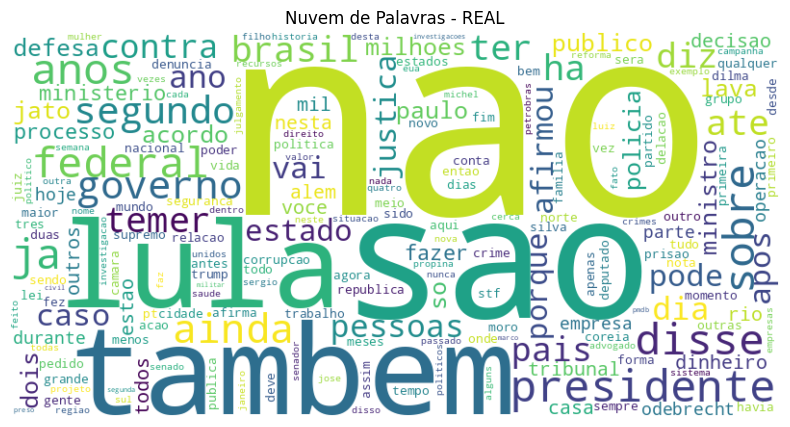

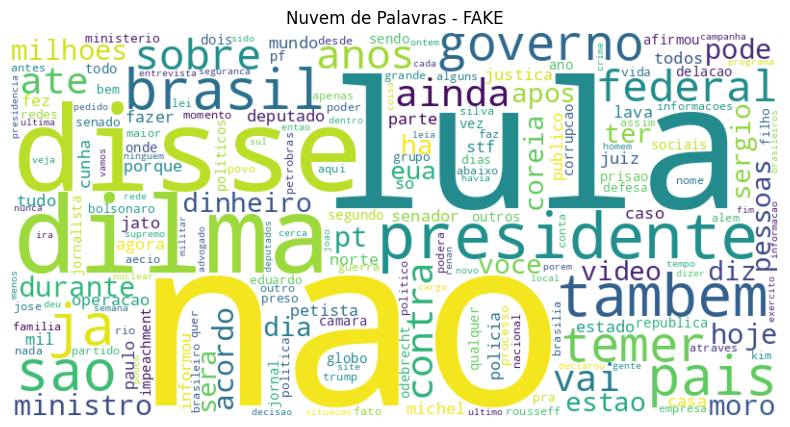

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stop_words = list(stopwords.words('portuguese'))

def get_ngrams_freq(texts, n):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return dict(words_freq)

# Textos por classe
real_texts = df[df['label'] == 'true']['text_clean']
fake_texts = df[df['label'] == 'fake']['text_clean']

# Frequências
real_ngrams = get_ngrams_freq(real_texts, 1)
fake_ngrams = get_ngrams_freq(fake_texts, 1)

# Nuvem - REAL
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(real_ngrams)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis('off')
plt.title('Nuvem de Palavras - REAL')
plt.show()

# Nuvem - FAKE
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fake_ngrams)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis('off')
plt.title('Nuvem de Palavras - FAKE')
plt.show()